In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Loading file and type casting

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('Final.csv')

df['Perishable'] = df['Perishable'].astype(object)
df['Id'] = df['Id'].astype(object)
df['Store Nbr'] = df['Store Nbr'].astype(object)
df['Transferred'] = df['Transferred'].astype(object)
df['Class'] = df['Class'].astype(object)
df['Cluster'] = df['Cluster'].astype(object)
df['Onpromotion'] = df['Onpromotion'].astype(object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    100000 non-null  int64  
 1   Date          100000 non-null  object 
 2   Id            100000 non-null  object 
 3   Type          100000 non-null  object 
 4   Family        100000 non-null  object 
 5   Locale        100000 non-null  object 
 6   Locale Name   100000 non-null  object 
 7   State         100000 non-null  object 
 8   Store Nbr     100000 non-null  object 
 9   Transferred   100000 non-null  object 
 10  Class         100000 non-null  object 
 11  Cluster       100000 non-null  object 
 12  Onpromotion   100000 non-null  object 
 13  Perishable    100000 non-null  object 
 14  Dcoilwtico    100000 non-null  float64
 15  Unit Sales    100000 non-null  float64
 16  Transactions  100000 non-null  int64  
dtypes: float64(2), int64(2), object(13)
memory usage:

In [4]:
df.head()

,Unnamed: 0,Date,Id,Type,Family,Locale,Locale Name,State,Store Nbr,Transferred,Class,Cluster,Onpromotion,Perishable,Dcoilwtico,Unit Sales,Transactions
0,784051,11/6/2014,34644254,B,GROCERY I,Regional,Santo Domingo de los Tsachilas,Los Rios,31,False,1022,10,False,0,77.87,14.0,1268
1,493024,5/24/2016,80164020,C,GROCERY I,National,Ecuador,Manabi,54,True,1034,3,True,0,48.04,2.0,816
2,421524,8/24/2016,88922696,B,GROCERY I,Local,Ambato,Pichincha,9,False,1056,6,False,0,46.29,2.0,1744
3,171897,4/1/2016,75014142,E,PLAYERS AND ELECTRONICS,Regional,Cotopaxi,Guayas,28,False,5446,10,False,0,35.36,2.0,1238
4,106636,4/18/2016,76613817,D,CLEANING,National,Ecuador,Pichincha,1,False,3038,13,False,0,39.74,5.0,2133


### To use label encoding to convert all categorical features for generating feature importances

In [5]:
categorical = ['Id','Type','Family','Locale','Onpromotion','Perishable','Locale Name','State','Transferred','Class','Cluster']

In [6]:
from sklearn.preprocessing import LabelEncoder

for col in categorical:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [7]:
df.head()

,Unnamed: 0,Date,Id,Type,Family,Locale,Locale Name,State,Store Nbr,Transferred,Class,Cluster,Onpromotion,Perishable,Dcoilwtico,Unit Sales,Transactions
0,784051,11/6/2014,19875,1,12,2,23,9,31,0,11,9,0,0,77.87,14.0,1268
1,493024,5/24/2016,68882,2,12,1,4,10,54,1,21,2,1,0,48.04,2.0,816
2,421524,8/24/2016,77456,1,12,0,0,12,9,0,35,5,0,0,46.29,2.0,1744
3,171897,4/1/2016,37854,4,27,2,2,6,28,0,264,9,0,0,35.36,2.0,1238
4,106636,4/18/2016,40799,3,7,1,4,12,1,0,223,12,0,0,39.74,5.0,2133


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.head()

,Date,Id,Type,Family,Locale,Locale Name,State,Store Nbr,Transferred,Class,Cluster,Onpromotion,Perishable,Dcoilwtico,Unit Sales,Transactions
0,11/6/2014,19875,1,12,2,23,9,31,0,11,9,0,0,77.87,14.0,1268
1,5/24/2016,68882,2,12,1,4,10,54,1,21,2,1,0,48.04,2.0,816
2,8/24/2016,77456,1,12,0,0,12,9,0,35,5,0,0,46.29,2.0,1744
3,4/1/2016,37854,4,27,2,2,6,28,0,264,9,0,0,35.36,2.0,1238
4,4/18/2016,40799,3,7,1,4,12,1,0,223,12,0,0,39.74,5.0,2133


### Renaming columns for OLS reports

In [10]:
# Replace column name in-place
df.rename(columns={'Unit Sales': 'unit_sales'}, inplace=True)


In [11]:
df.rename(columns={'Locale Name': 'locale_name'}, inplace=True)

In [12]:
df.rename(columns={'Store Nbr': 'stor_nbr'}, inplace=True)

In [13]:
df.head()

,Date,Id,Type,Family,Locale,locale_name,State,stor_nbr,Transferred,Class,Cluster,Onpromotion,Perishable,Dcoilwtico,unit_sales,Transactions
0,11/6/2014,19875,1,12,2,23,9,31,0,11,9,0,0,77.87,14.0,1268
1,5/24/2016,68882,2,12,1,4,10,54,1,21,2,1,0,48.04,2.0,816
2,8/24/2016,77456,1,12,0,0,12,9,0,35,5,0,0,46.29,2.0,1744
3,4/1/2016,37854,4,27,2,2,6,28,0,264,9,0,0,35.36,2.0,1238
4,4/18/2016,40799,3,7,1,4,12,1,0,223,12,0,0,39.74,5.0,2133


### Standard scaling of continuous variables

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['Dcoilwtico','unit_sales','Transactions']

for i in features:
    df[i] =  scaler.fit_transform(df[i].values.reshape(-1,1))

In [15]:
df_copy = df.copy()

### Outlier Treatment

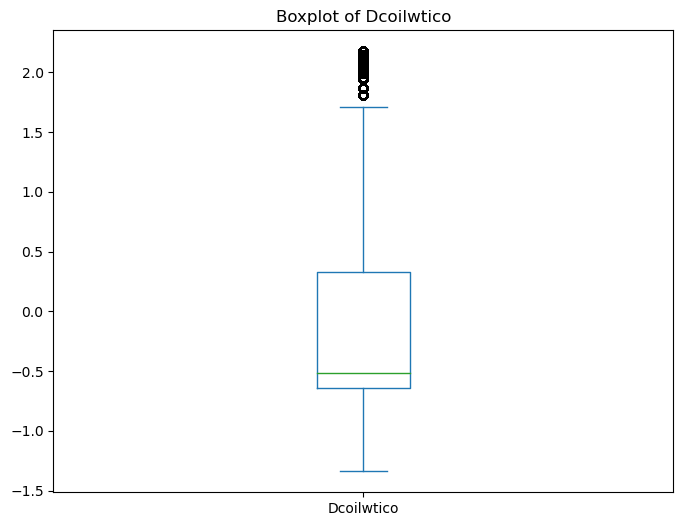

Number of outliers in Dcoilwtico: 14693


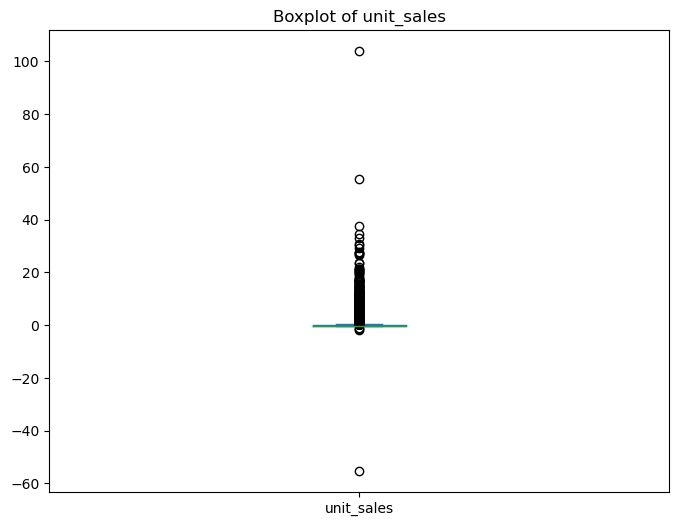

Number of outliers in unit_sales: 9153


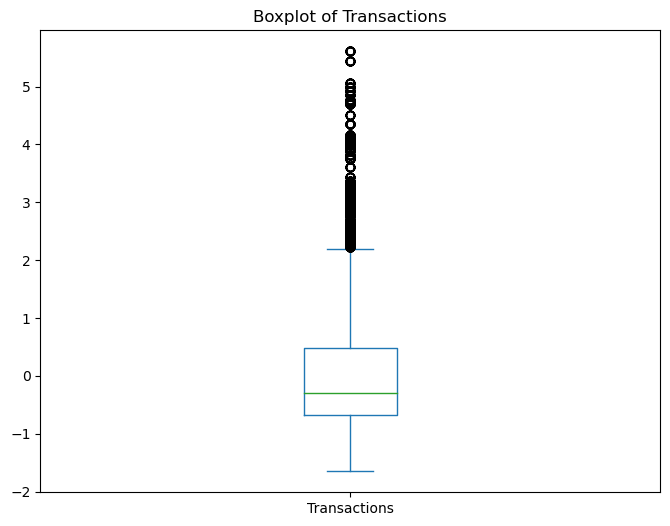

Number of outliers in Transactions: 3288


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'feature1', 'feature2', ..., 'featureN'
for column in features:
    # Create a boxplot for the current feature
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='box')
    plt.title(f'Boxplot of {column}')
    plt.show()

    # Detect outliers using the IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Print the number of outliers
    print(f'Number of outliers in {column}: {len(outliers)}')

    # Treat the outliers (e.g., remove, replace with median, or apply winsorization)
    if len(outliers) > 0:
        # Option 1: Remove the outliers
        #df = df[~df[column].isin(outliers.index)]

        # Option 2: Replace the outliers with the median
        #df.loc[outliers.index, column] = df[column].median()

        # Option 3: Apply winsorization
        df[column] = df[column].clip(lower_bound, upper_bound)

### OLS summary for feature significance

In [17]:
# Fit the linear regression model
model = ols('Transactions ~ Type + Locale + Dcoilwtico + unit_sales', data=df).fit()

# Print the summary of the model
print(model.summary())

# Check the p-values of the features
pvalues = model.pvalues
print('P-values of the features:')
print(pvalues)

# Evaluate the relevance of the features
significance_level = 0.05  # Set the desired significance level (e.g., 5%)

print('Relevant features:')
for feature, p_value in pvalues.items():
    if p_value < significance_level:
        print(f'{feature} is relevant (p-value = {p_value:.4f})')
    else:
        print(f'{feature} is not relevant (p-value = {p_value:.4f})')

                            OLS Regression Results                            
Dep. Variable:           Transactions   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                 1.147e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:52:17   Log-Likelihood:            -1.1009e+05
No. Observations:              100000   AIC:                         2.202e+05
Df Residuals:                   99995   BIC:                         2.202e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6579      0.005    130.407      0.0

### Split the dataset into features (X) and target (y)

In [18]:
# Split the dataset into features (X) and target (y)
X = df[['Type','Dcoilwtico','unit_sales','Locale']]
y = df['Transactions']

### Linear Regression

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Split the dataset into features (X) and target (y)
X = df[['Type','Dcoilwtico','unit_sales','Locale']]
y = df['Transactions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 0.73
R-squared: 0.31


### ANOVA shows interaction has significance

In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('Transactions ~ Type + Locale + Type:Locale', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                   sum_sq       df             F        PR(>F)
Type         21247.117933      1.0  38027.143772  0.000000e+00
Locale         117.973380      1.0    211.143493  8.653382e-48
Type:Locale      7.813008      1.0     13.983374  1.845372e-04
Residual     55871.322273  99996.0           NaN           NaN


### OLS Summary including interaction between the categorical features

In [21]:
# Fit the linear regression model
model = ols('Transactions ~ Type + Locale + Type:Locale + Dcoilwtico + unit_sales', data=df).fit()

# Print the summary of the model
print(model.summary())

# Check the p-values of the features
pvalues = model.pvalues
print('P-values of the features:')
print(pvalues)

# Evaluate the relevance of the features
significance_level = 0.05  # Set the desired significance level (e.g., 5%)

print('Relevant features:')
for feature, p_value in pvalues.items():
    if p_value < significance_level:
        print(f'{feature} is relevant (p-value = {p_value:.4f})')
    else:
        print(f'{feature} is not relevant (p-value = {p_value:.4f})')

                            OLS Regression Results                            
Dep. Variable:           Transactions   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     9178.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:52:22   Log-Likelihood:            -1.1009e+05
No. Observations:              100000   AIC:                         2.202e+05
Df Residuals:                   99994   BIC:                         2.202e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6416      0.007     97.501      

### Decision Tree Regressor

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Split the dataset into features (X) and target (y)
X = df_copy[['Type','Dcoilwtico','unit_sales','Locale']]
y = df_copy['Transactions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Regression Tree model
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 0.61
R-squared: 0.63


### HPO for Decision Tree Regressor

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X = df_copy[['Type','Dcoilwtico','unit_sales','Locale']]
y = df_copy['Transactions']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 2}
Root Mean Squared Error: 0.55
R-squared: 0.69


### Best fit polynomial Regression at n=5

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into features (X) and target (y)
X = df[['Type','Dcoilwtico','unit_sales','Locale']]
y = df['Transactions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Polynomial Features transformer
poly = PolynomialFeatures(degree=5)  # Specify the degree of the polynomial

# Transform the training and testing data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the transformed training data
model.fit(X_train_poly, y_train)

# Make predictions on the transformed test data
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 0.56
R-squared: 0.59


In [327]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into features (X) and target (y)
X = df.drop(['Transactions','Date','Id'], axis=1)
y = df['Transactions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Regression Tree model
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Get feature importances
feature_importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_importances = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Print the feature importances in descending order
print("Feature Importances:")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.2f}")

Root Mean Squared Error: 0.01
R-squared: 1.00
Feature Importances:
Type: 0.45
stor_nbr: 0.24
Dcoilwtico: 0.22
Cluster: 0.06
locale_name: 0.01
State: 0.01
Locale: 0.00
Transferred: 0.00
unit_sales: 0.00
Onpromotion: 0.00
Class: 0.00
Family: 0.00
Perishable: 0.00


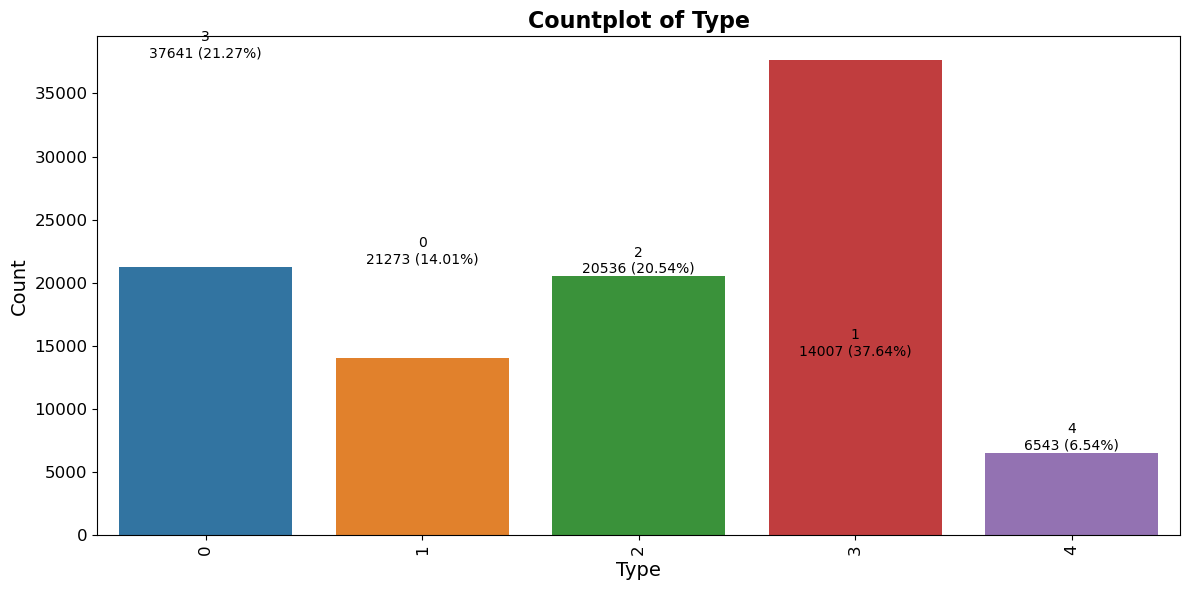

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select the feature you want to create a countplot for
feature = 'Type'

# Calculate the counts and percentages for each unique value of the feature
feature_counts = df[feature].value_counts()
feature_percentages = (feature_counts / feature_counts.sum()) * 100

# Create the countplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=feature, data=df, ax=ax)

# Add the count and percentage labels to the bars
for i, (label, count) in enumerate(feature_counts.items()):
    percentage = feature_percentages[i]
    ax.text(i, count + 0.5, f"{label}\n{count} ({percentage:.2f}%)", ha='center', va='bottom', fontsize=10)

# Set the title, axis labels, and tick label rotation
ax.set_title(f"Countplot of {feature}", fontsize=16, fontweight='bold')
ax.set_xlabel(feature, fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

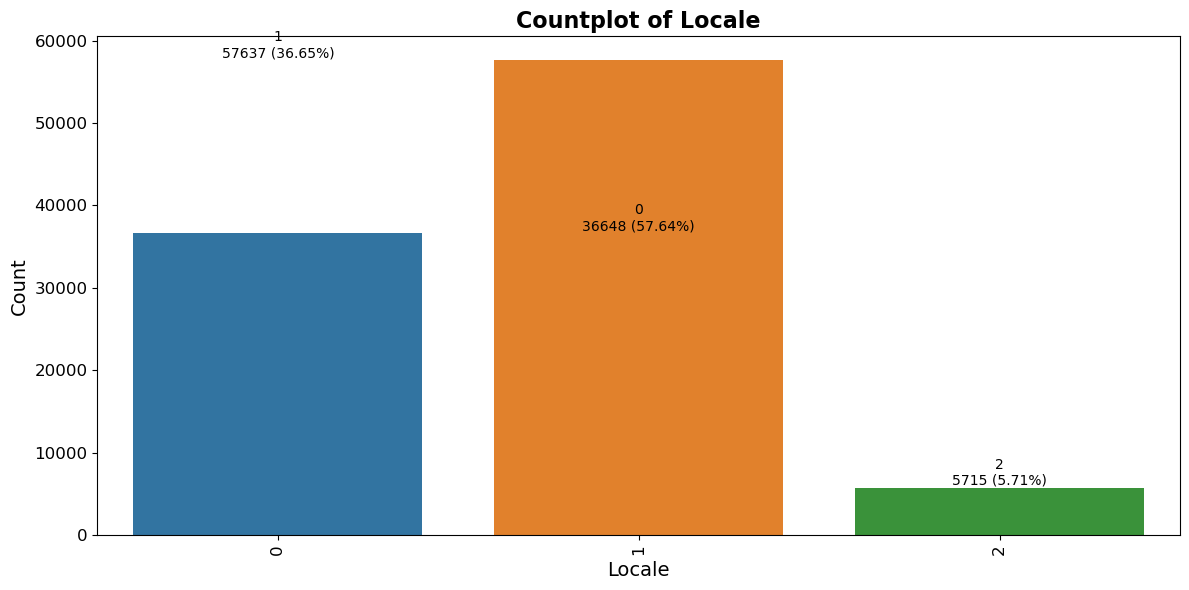

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select the feature you want to create a countplot for
feature = 'Locale'

# Calculate the counts and percentages for each unique value of the feature
feature_counts = df[feature].value_counts()
feature_percentages = (feature_counts / feature_counts.sum()) * 100

# Create the countplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=feature, data=df, ax=ax)

# Add the count and percentage labels to the bars
for i, (label, count) in enumerate(feature_counts.items()):
    percentage = feature_percentages[i]
    ax.text(i, count + 0.5, f"{label}\n{count} ({percentage:.2f}%)", ha='center', va='bottom', fontsize=10)

# Set the title, axis labels, and tick label rotation
ax.set_title(f"Countplot of {feature}", fontsize=16, fontweight='bold')
ax.set_xlabel(feature, fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### One hot Encoding

In [25]:
import pandas as pd

# Select the categorical feature you want to one-hot encode
categorical_feature = 'Type'

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df[categorical_feature], prefix=categorical_feature)

# Add the one-hot encoded features to the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original categorical feature (optional)
df = df.drop(categorical_feature, axis=1)

# Display the updated DataFrame
df.head()

,Date,Id,Family,Locale,locale_name,State,stor_nbr,Transferred,Class,Cluster,Onpromotion,Perishable,Dcoilwtico,unit_sales,Transactions,Type_0,Type_1,Type_2,Type_3,Type_4
0,11/6/2014,19875,12,2,23,9,31,0,11,9,0,0,0.854773,0.284028,-0.582249,0,1,0,0,0
1,5/24/2016,68882,12,1,4,10,54,1,21,2,1,0,-0.456037,-0.341827,-0.979912,0,0,1,0,0
2,8/24/2016,77456,12,0,0,12,9,0,35,5,0,0,-0.532937,-0.341827,-0.163472,0,1,0,0,0
3,4/1/2016,37854,27,2,2,6,28,0,264,9,0,0,-1.013230,-0.341827,-0.608643,0,0,0,0,1
4,4/18/2016,40799,7,1,4,12,1,0,223,12,0,0,-0.820761,-0.185363,0.178764,0,0,0,1,0


In [52]:
import pandas as pd

# Select the categorical feature you want to one-hot encode
categorical_feature = 'Type'

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df_copy[categorical_feature], prefix=categorical_feature)

# Add the one-hot encoded features to the original DataFrame
df_copy = pd.concat([df_copy, one_hot_encoded], axis=1)

# Drop the original categorical feature (optional)
df_copy = df_copy.drop(categorical_feature, axis=1)

# Display the updated DataFrame
df_copy.head()

,Date,Id,Family,Locale,locale_name,State,stor_nbr,Transferred,Class,Cluster,Onpromotion,Perishable,Dcoilwtico,unit_sales,Transactions,Type_0,Type_1,Type_2,Type_3,Type_4
0,11/6/2014,19875,12,2,23,9,31,0,11,9,0,0,0.854773,0.284028,-0.582249,0,1,0,0,0
1,5/24/2016,68882,12,1,4,10,54,1,21,2,1,0,-0.456037,-0.341827,-0.979912,0,0,1,0,0
2,8/24/2016,77456,12,0,0,12,9,0,35,5,0,0,-0.532937,-0.341827,-0.163472,0,1,0,0,0
3,4/1/2016,37854,27,2,2,6,28,0,264,9,0,0,-1.013230,-0.341827,-0.608643,0,0,0,0,1
4,4/18/2016,40799,7,1,4,12,1,0,223,12,0,0,-0.820761,-0.185363,0.178764,0,0,0,1,0


In [26]:
import pandas as pd

# Select the categorical feature you want to one-hot encode
categorical_feature = 'Locale'

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df[categorical_feature], prefix=categorical_feature)

# Add the one-hot encoded features to the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original categorical feature (optional)
df = df.drop(categorical_feature, axis=1)

# Display the updated DataFrame
df.head()

,Date,Id,Family,locale_name,State,stor_nbr,Transferred,Class,Cluster,Onpromotion,...,unit_sales,Transactions,Type_0,Type_1,Type_2,Type_3,Type_4,Locale_0,Locale_1,Locale_2
0,11/6/2014,19875,12,23,9,31,0,11,9,0,...,0.284028,-0.582249,0,1,0,0,0,0,0,1
1,5/24/2016,68882,12,4,10,54,1,21,2,1,...,-0.341827,-0.979912,0,0,1,0,0,0,1,0
2,8/24/2016,77456,12,0,12,9,0,35,5,0,...,-0.341827,-0.163472,0,1,0,0,0,1,0,0
3,4/1/2016,37854,27,2,6,28,0,264,9,0,...,-0.341827,-0.608643,0,0,0,0,1,0,0,1
4,4/18/2016,40799,7,4,12,1,0,223,12,0,...,-0.185363,0.178764,0,0,0,1,0,0,1,0


In [53]:
import pandas as pd

# Select the categorical feature you want to one-hot encode
categorical_feature = 'Locale'

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df_copy[categorical_feature], prefix=categorical_feature)

# Add the one-hot encoded features to the original DataFrame
df_copy = pd.concat([df_copy, one_hot_encoded], axis=1)

# Drop the original categorical feature (optional)
df_copy = df_copy.drop(categorical_feature, axis=1)

# Display the updated DataFrame
df_copy.head()

,Date,Id,Family,locale_name,State,stor_nbr,Transferred,Class,Cluster,Onpromotion,...,unit_sales,Transactions,Type_0,Type_1,Type_2,Type_3,Type_4,Locale_0,Locale_1,Locale_2
0,11/6/2014,19875,12,23,9,31,0,11,9,0,...,0.284028,-0.582249,0,1,0,0,0,0,0,1
1,5/24/2016,68882,12,4,10,54,1,21,2,1,...,-0.341827,-0.979912,0,0,1,0,0,0,1,0
2,8/24/2016,77456,12,0,12,9,0,35,5,0,...,-0.341827,-0.163472,0,1,0,0,0,1,0,0
3,4/1/2016,37854,27,2,6,28,0,264,9,0,...,-0.341827,-0.608643,0,0,0,0,1,0,0,1
4,4/18/2016,40799,7,4,12,1,0,223,12,0,...,-0.185363,0.178764,0,0,0,1,0,0,1,0


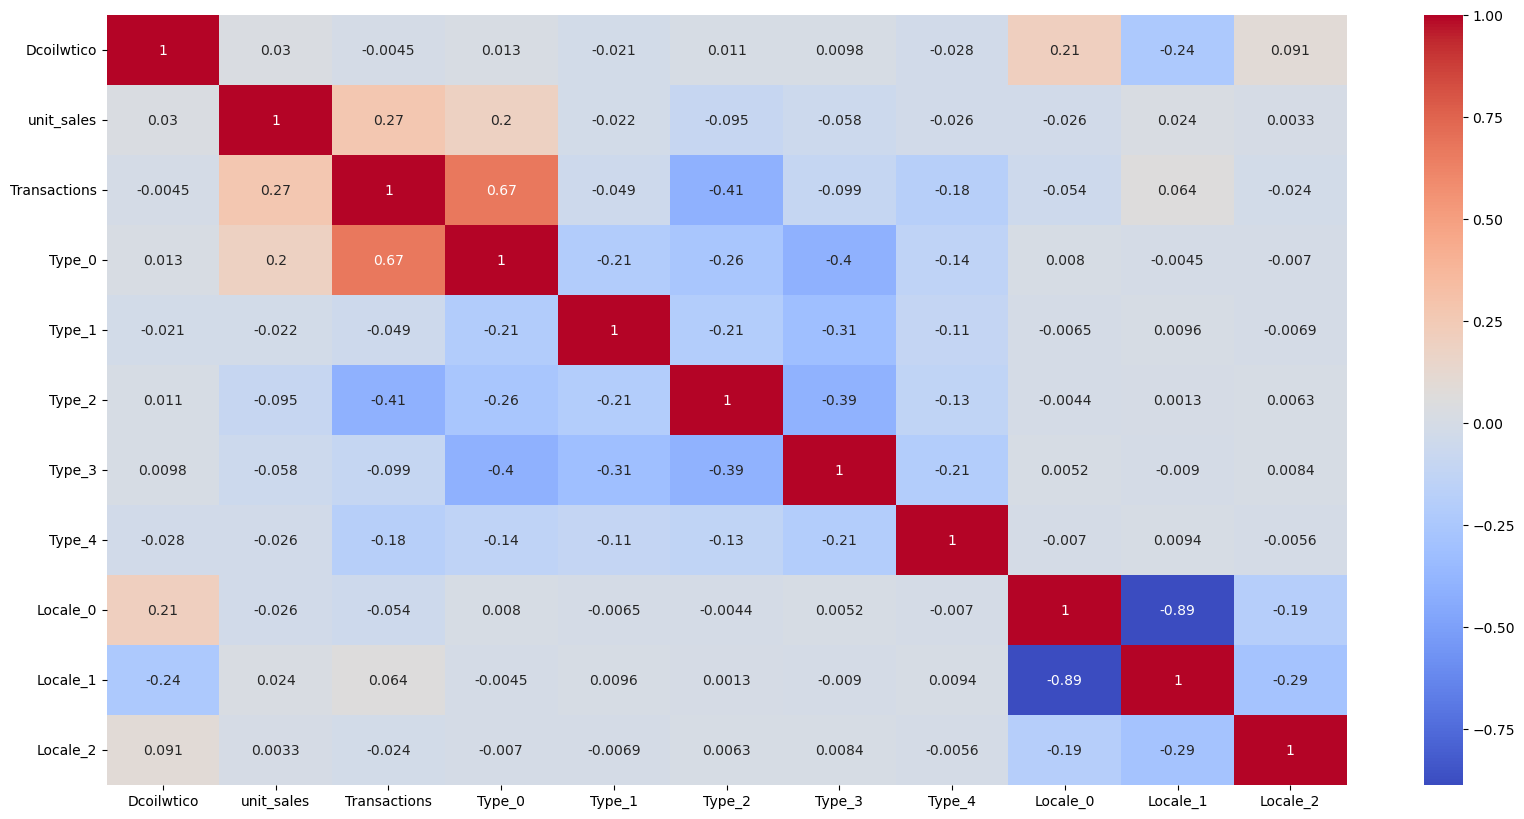

In [63]:
import seaborn as sns
plt.figure(figsize=(20, 10))
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

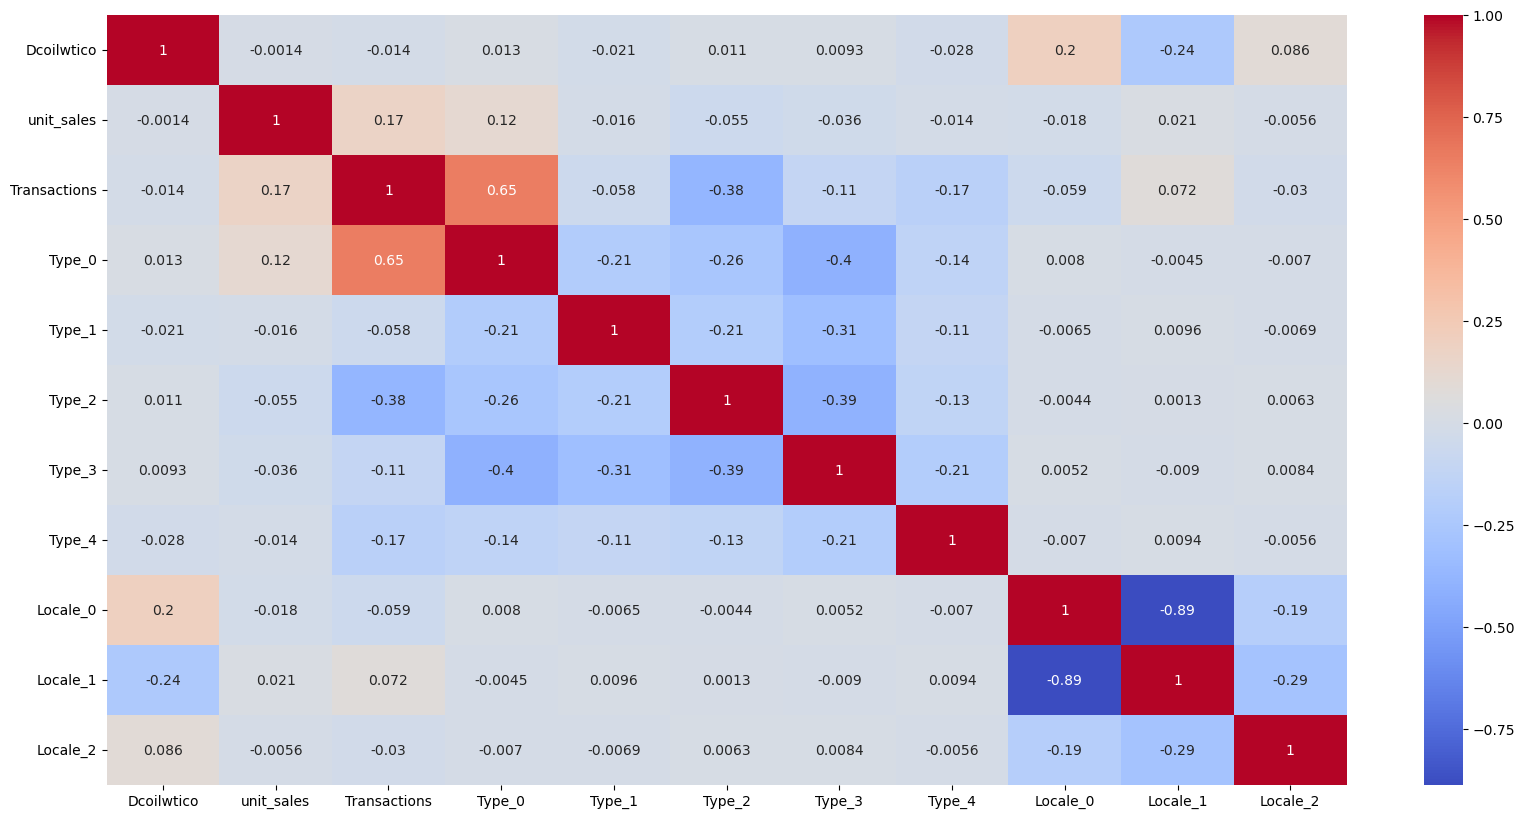

In [64]:
import seaborn as sns
plt.figure(figsize=(20, 10))
# Calculate the correlation matrix
corr_matrix = df_copy.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

### backup

In [27]:
relevant = ['Type_0','Type_1','Type_2','Type_3','Type_4','Locale_0','Locale_1','Locale_2','Dcoilwtico','unit_sales']

### Changes only for model purposes; backup in df_copy

In [28]:
irrelevant = ['Id','Date','locale_name','Family','State','stor_nbr','Transferred','Class','Cluster','Perishable','Onpromotion']

In [29]:
df = df.drop(irrelevant,axis = 1)

In [54]:
df_copy = df_copy.drop(irrelevant,axis=1)

In [30]:
df.columns

Index(['Dcoilwtico', 'unit_sales', 'Transactions', 'Type_0', 'Type_1',
       'Type_2', 'Type_3', 'Type_4', 'Locale_0', 'Locale_1', 'Locale_2'],
      dtype='object')

In [31]:
df.isnull().sum()

Dcoilwtico      0
unit_sales      0
Transactions    0
Type_0          0
Type_1          0
Type_2          0
Type_3          0
Type_4          0
Locale_0        0
Locale_1        0
Locale_2        0
dtype: int64

In [32]:
df.shape

(100000, 11)

In [33]:
df.columns

Index(['Dcoilwtico', 'unit_sales', 'Transactions', 'Type_0', 'Type_1',
       'Type_2', 'Type_3', 'Type_4', 'Locale_0', 'Locale_1', 'Locale_2'],
      dtype='object')

### Again ANOVA checking for interaction on OHE

In [34]:
df.shape

(100000, 11)

In [35]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_0 + Locale_0 + Type_0:Locale_0
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df             F         PR(>F)
Type_0           34653.400535      1.0  81923.588403   0.000000e+00
Locale_0           270.663216      1.0    639.870881  9.910007e-141
Type_0:Locale_0     49.183116      1.0    116.273074   4.286318e-27
Residual         42297.969455  99996.0           NaN            NaN


In [36]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_0 + Locale_1 + Type_0:Locale_1 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df             F         PR(>F)
Type_0           34636.921069      1.0  82035.414988   0.000000e+00
Locale_1           343.308210      1.0    813.104358  3.969238e-178
Type_0:Locale_1     54.284036      1.0    128.568396   8.790148e-30
Residual         42220.223542  99996.0           NaN            NaN


In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_0 + Locale_2 + Type_0:Locale_2 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df             F        PR(>F)
Type_0           34591.335859      1.0  81219.112592  0.000000e+00
Locale_2            28.011979      1.0     65.771039  5.121421e-16
Type_0:Locale_2      1.364829      1.0      3.204566  7.343601e-02
Residual         42588.438979  99996.0           NaN           NaN


In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_1 + Locale_0 + Type_1:Locale_0 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df           F        PR(>F)
Type_1             187.252677      1.0  243.770217  6.880189e-55
Locale_0           226.794128      1.0  295.246265  4.452237e-66
Type_1:Locale_0      1.132971      1.0    1.474930  2.245723e-01
Residual         76812.167458  99996.0         NaN           NaN


In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_1 + Locale_1 + Type_1:Locale_1 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df           F        PR(>F)
Type_1             189.240307      1.0  246.655325  1.622226e-55
Locale_1           317.906217      1.0  414.358138  6.342898e-92
Type_1:Locale_1      2.686096      1.0    3.501050  6.133284e-02
Residual         76719.502244  99996.0         NaN           NaN


In [40]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_1 + Locale_2 + Type_1:Locale_2 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df           F        PR(>F)
Type_1             185.847455      1.0  241.369478  2.289703e-54
Locale_2            44.802344      1.0   58.187068  2.404353e-14
Type_1:Locale_2      1.290399      1.0    1.675906  1.954724e-01
Residual         76994.001814  99996.0         NaN           NaN


In [41]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_2 + Locale_0 + Type_2:Locale_0 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df             F        PR(>F)
Type_2           12774.848615      1.0  19892.912228  0.000000e+00
Locale_0           239.346097      1.0    372.708205  6.820244e-83
Type_2:Locale_0     10.181519      1.0     15.854596  6.844853e-05
Residual         64215.522972  99996.0           NaN           NaN


In [42]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_2 + Locale_1 + Type_2:Locale_1 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df             F         PR(>F)
Type_2           12765.010018      1.0  19903.234108   0.000000e+00
Locale_1           318.631959      1.0    496.811712  8.706964e-110
Type_2:Locale_1     13.628206      1.0     21.249132   4.037907e-06
Residual         64132.790422  99996.0           NaN            NaN


In [43]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_2 + Locale_2 + Type_2:Locale_2 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df             F        PR(>F)
Type_2           12750.718370      1.0  19789.631578  0.000000e+00
Locale_2            34.629290      1.0     53.746062  2.298654e-13
Type_2:Locale_2      1.691079      1.0      2.624623  1.052207e-01
Residual         64428.730219  99996.0           NaN           NaN


In [44]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_3 + Locale_0 + Type_3:Locale_0 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df           F         PR(>F)
Type_3             754.262415      1.0  989.209957  4.542562e-216
Locale_0           219.918032      1.0  288.420983   1.353277e-64
Type_3:Locale_0      0.369524      1.0    0.484628   4.863353e-01
Residual         76245.921168  99996.0         NaN            NaN


In [45]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_3 + Locale_1 +  Type_3:Locale_1 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df           F         PR(>F)
Type_3             749.811567      1.0  984.462941  4.775967e-215
Locale_1           304.591644      1.0  399.912723   8.589873e-89
Type_3:Locale_1      0.134147      1.0    0.176129   6.747225e-01
Residual         76161.482932  99996.0         NaN            NaN


In [46]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_3 + Locale_2 +  Type_3:Locale_2 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df           F         PR(>F)
Type_3             755.478918      1.0  988.480964  6.519404e-216
Locale_2            40.547974      1.0   53.053632   3.269415e-13
Type_3:Locale_2      0.446109      1.0    0.583696   4.448689e-01
Residual         76425.214641  99996.0         NaN            NaN


In [47]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_4 + Locale_0 +  Type_4:Locale_0 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df            F        PR(>F)
Type_4            2541.611563      1.0  3413.305125  0.000000e+00
Locale_0           234.754431      1.0   315.267885  1.995529e-70
Type_4:Locale_0      0.028376      1.0     0.038108  8.452263e-01
Residual         74458.913167  99996.0          NaN           NaN


In [48]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_4 + Locale_1 +  Type_4:Locale_1 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df            F        PR(>F)
Type_4            2547.985484      1.0  3426.270289  0.000000e+00
Locale_1           330.252811      1.0   444.090205  2.284188e-98
Type_4:Locale_1      0.262504      1.0     0.352989  5.524276e-01
Residual         74363.180659  99996.0          NaN           NaN


In [49]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('''
            Transactions ~ Type_4 + Locale_2 +  Type_4:Locale_2 
            ''' 
            , data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df            F        PR(>F)
Type_4            2534.773573      1.0  3395.590385  0.000000e+00
Locale_2            47.329880      1.0    63.403251  1.701940e-15
Type_4:Locale_2      0.372458      1.0     0.498946  4.799652e-01
Residual         74645.993636  99996.0          NaN           NaN


Removing all unnecessary interactions and only using significant interactions in model.

### Again Linear model ols

In [50]:
 # Fit the linear regression model
model = ols('''
            Transactions ~ Type_0 + Type_1 + Type_2 + Type_3 + Type_4 + 
            Locale_0 + Locale_1 + Locale_2 +
            Type_0:Locale_0 + Type_0:Locale_1 +
            Type_2:Locale_0 + Type_2:Locale_1 + 
            Dcoilwtico + unit_sales
            ''', data=df).fit()

# Print the summary of the model
print(model.summary())

# Check the p-values of the features
pvalues = model.pvalues
print('P-values of the features:')
print(pvalues)

# Evaluate the relevance of the features
significance_level = 0.05  # Set the desired significance level (e.g., 5%)

print('Relevant features:')
for feature, p_value in pvalues.items():
    if p_value < significance_level:
        print(f'{feature} is relevant (p-value = {p_value:.4f})')
    else:
        print(f'{feature} is not relevant (p-value = {p_value:.4f})')

                            OLS Regression Results                            
Dep. Variable:           Transactions   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     9999.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:56:50   Log-Likelihood:                -89549.
No. Observations:              100000   AIC:                         1.791e+05
Df Residuals:                   99987   BIC:                         1.792e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0637      0.004    -

In [51]:
 # Fit the linear regression model
model = ols('''
            Transactions ~ Type_0 + Type_1 + Type_2 + Type_3 + Type_4 + 
            Locale_0 + Locale_1 + Locale_2 + 
            Dcoilwtico + unit_sales
            ''', data=df).fit()

# Print the summary of the model
print(model.summary())

# Check the p-values of the features
pvalues = model.pvalues
print('P-values of the features:')
print(pvalues)

# Evaluate the relevance of the features
significance_level = 0.05  # Set the desired significance level (e.g., 5%)

print('Relevant features:')
for feature, p_value in pvalues.items():
    if p_value < significance_level:
        print(f'{feature} is relevant (p-value = {p_value:.4f})')
    else:
        print(f'{feature} is not relevant (p-value = {p_value:.4f})')

                            OLS Regression Results                            
Dep. Variable:           Transactions   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                 1.495e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:56:51   Log-Likelihood:                -89630.
No. Observations:              100000   AIC:                         1.793e+05
Df Residuals:                   99991   BIC:                         1.794e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0633      0.002    -29.815      0.0

In [55]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X = df_copy[relevant]
y = df_copy['Transactions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 2}
Root Mean Squared Error: 0.55
R-squared: 0.69


In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[relevant]
y = df['Transactions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Polynomial Features transformer
poly = PolynomialFeatures(degree=5)  # Specify the degree of the polynomial

# Transform the training and testing data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the transformed training data
model.fit(X_train_poly, y_train)

# Make predictions on the transformed test data
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 0.56
R-squared: 0.59


In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear_pred = linear_model.predict(X)
linear_r2 = r2_score(y, y_linear_pred)

# Fit a polynomial regression model (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)
poly_r2 = r2_score(y, y_poly_pred)

# Compare the R-squared values
print(f'Linear Regression R-squared: {linear_r2:.4f}')
print(f'Polynomial Regression R-squared: {poly_r2:.4f}')

# Determine the better fit
if poly_r2 > linear_r2:
    print('Polynomial regression provides a better fit to the data.')
else:
    print('Linear regression provides a better fit to the data.')

Linear Regression R-squared: 0.5446
Polynomial Regression R-squared: 0.5647
Polynomial regression provides a better fit to the data.


In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear_pred = linear_model.predict(X)
linear_r2 = r2_score(y, y_linear_pred)

# Fit a polynomial regression model (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)
poly_r2 = r2_score(y, y_poly_pred)

# Compare the R-squared values
print(f'Linear Regression R-squared: {linear_r2:.4f}')
print(f'Polynomial Regression R-squared: {poly_r2:.4f}')

# Determine the better fit
if poly_r2 > linear_r2:
    print('Polynomial regression provides a better fit to the data.')
else:
    print('Linear regression provides a better fit to the data.')

Linear Regression R-squared: 0.5446
Polynomial Regression R-squared: 0.5712
Polynomial regression provides a better fit to the data.


In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear_pred = linear_model.predict(X)
linear_r2 = r2_score(y, y_linear_pred)

# Fit a polynomial regression model (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)
poly_r2 = r2_score(y, y_poly_pred)

# Compare the R-squared values
print(f'Linear Regression R-squared: {linear_r2:.4f}')
print(f'Polynomial Regression R-squared: {poly_r2:.4f}')

# Determine the better fit
if poly_r2 > linear_r2:
    print('Polynomial regression provides a better fit to the data.')
else:
    print('Linear regression provides a better fit to the data.')

Linear Regression R-squared: 0.5446
Polynomial Regression R-squared: 0.5925
Polynomial regression provides a better fit to the data.


In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear_pred = linear_model.predict(X)
linear_r2 = r2_score(y, y_linear_pred)

# Fit a polynomial regression model (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)
poly_r2 = r2_score(y, y_poly_pred)

# Compare the R-squared values
print(f'Linear Regression R-squared: {linear_r2:.4f}')
print(f'Polynomial Regression R-squared: {poly_r2:.4f}')

# Determine the better fit
if poly_r2 > linear_r2:
    print('Polynomial regression provides a better fit to the data.')
else:
    print('Linear regression provides a better fit to the data.')

Linear Regression R-squared: 0.5446
Polynomial Regression R-squared: 0.6006
Polynomial regression provides a better fit to the data.
